# EntHire Internship Project

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.regularizers import l2
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight

Using TensorFlow backend.


## Reading the data

In [2]:
Airline=pd.read_csv("airline_sentiment_analysis.csv")

In [3]:
Airline=Airline.loc[:,::-1]

In [4]:
Airline=Airline.iloc[:,0:2].values

In [5]:
X = Airline[:, :-1]
y = Airline[:, -1]

In [6]:
labelencoder=LabelEncoder()
y=labelencoder.fit_transform(y)

## Use OOPs concept to load training data/Data Preprocessing

In [7]:
X=X.flatten()

In [8]:
class text_preprocess():
    def __init__(self,mess,corpus=[]):
        self.corpus=[]
        self.mess=mess


    def Preprocessing(self):
        for i in range(0, len(self.mess)):
            review = [word for word in self.mess[i].split() if not word[0]=="@"]
            review = ' '.join(review)
            review = re.sub('[^a-zA-Z]', ' ', review)
            review = review.lower()
            review = review.split()
            lemmatizer = WordNetLemmatizer()
            review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
            review = ' '.join(review)
            self.corpus.append(review)
        tokenizer = Tokenizer(oov_token="OOV")
        tokenizer.fit_on_texts(self.corpus)
        word_index=tokenizer.word_index
        sequence = tokenizer.texts_to_sequences(self.corpus)
        input_sequences= np.array(pad_sequences(sequence, maxlen=120, padding='pre'))
        return input_sequences

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
Predictor=text_preprocess(X)
input_sequences=Predictor.Preprocessing()


In [12]:
input_sequences=np.array(input_sequences)

In [13]:
print(input_sequences,y)

[[   0    0    0 ... 1183   86 4549]
 [   0    0    0 ...   17  348 2023]
 [   0    0    0 ...  313  110  174]
 ...
 [   0    0    0 ...  273    2  344]
 [   0    0    0 ... 1421    9  758]
 [   0    0    0 ... 1253   45 1755]] [1 0 0 ... 1 0 0]


## Splitting the data into train and test set

In [14]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(input_sequences, y, test_size = 0.20, random_state = 0)

## Use OOPs concept to train the model

In [15]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

In [28]:

class_weight_list = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weight = dict(zip(np.unique(y_train), class_weight_list))

In [18]:
class build_model:
   def __init__(self,x_train,y_train,x_test,y_test,callbacks=None, epochs=100):
    self.x_train=x_train
    self.y_train=y_train
    self.x_test=x_test
    self.y_test=y_test
    
   def layers(self, vocab_size,embedding_dim,num_epochs,max_length):
    lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7* 10**(epoch / 20))
    
    opt = tf.keras.optimizers.Adam(learning_rate=1e-7)
    
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
    history = model.fit(self.x_train, self.y_train, epochs=num_epochs, validation_data=(self.x_test, self.y_test),
                        class_weight=class_weight, verbose=2,callbacks=[lr_schedule])
    return history,model

In [19]:
base_model=build_model(X_train,y_train,X_test,y_test)

In [29]:
(history,model)=base_model.layers(vocab_size,embedding_dim,100,max_length)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 9232 samples, validate on 2309 samples
Epoch 1/100
9232/9232 - 8s - loss: 0.6934 - accuracy: 0.7950 - val_loss: 0.6915 - val_accuracy: 0.7964
Epoch 2/100
9232/9232 - 2s - loss: 0.6934 - accuracy: 0.7950 - val_loss: 0.6915 - val_accuracy: 0.7964
Epoch 3/100
9232/9232 - 2s - loss: 0.6934 - accuracy: 0.7950 - val_loss: 0.6915 - val_accuracy: 0.7964
Epoch 4/100
9232/9232 - 2s - loss: 0.6934 - accuracy: 0.7950 - val_loss: 0.6915 - val_accuracy: 0.7964
Epoch 5/100
9232/9232 - 2s - loss: 0.6934 - accuracy: 0.7950 - val_loss: 0.6915 - val_accuracy: 0.7964
Epoch 6/100
9232/9232 - 2s - loss: 0.6934 - accuracy: 0.7950 - val_loss: 0.6915 - val_accuracy: 0.7964
Epoch 7/100
9232/9232 - 2s - loss: 0.6934 - accuracy: 0.7950 - val_loss: 0.6915 - val_accuracy: 0.7964
Epoch 8/100
9232/9232 - 2s - loss: 0.6934 - accuracy: 0.7950 - val_loss: 0.6915 - val_accuracy: 0.7964
Epoch 9/100
9232/9232 - 2s - loss: 0.6934 - accuracy: 0.7950 - val_loss: 0.691

Epoch 78/100
9232/9232 - 1s - loss: 0.1745 - accuracy: 0.9354 - val_loss: 0.2836 - val_accuracy: 0.9099
Epoch 79/100
9232/9232 - 1s - loss: 0.1593 - accuracy: 0.9393 - val_loss: 0.2666 - val_accuracy: 0.8913
Epoch 80/100
9232/9232 - 1s - loss: 0.1432 - accuracy: 0.9445 - val_loss: 0.2661 - val_accuracy: 0.8822
Epoch 81/100
9232/9232 - 1s - loss: 0.1287 - accuracy: 0.9510 - val_loss: 0.2681 - val_accuracy: 0.8826
Epoch 82/100
9232/9232 - 1s - loss: 0.1180 - accuracy: 0.9548 - val_loss: 0.2921 - val_accuracy: 0.9177
Epoch 83/100
9232/9232 - 1s - loss: 0.1044 - accuracy: 0.9579 - val_loss: 0.2974 - val_accuracy: 0.9151
Epoch 84/100
9232/9232 - 1s - loss: 0.0922 - accuracy: 0.9669 - val_loss: 0.3167 - val_accuracy: 0.9181
Epoch 85/100
9232/9232 - 2s - loss: 0.0837 - accuracy: 0.9697 - val_loss: 0.3587 - val_accuracy: 0.9207
Epoch 86/100
9232/9232 - 2s - loss: 0.0759 - accuracy: 0.9712 - val_loss: 0.3486 - val_accuracy: 0.9155
Epoch 87/100
9232/9232 - 1s - loss: 0.0636 - accuracy: 0.9758 - 

Text(0, 0.5, 'Loss')

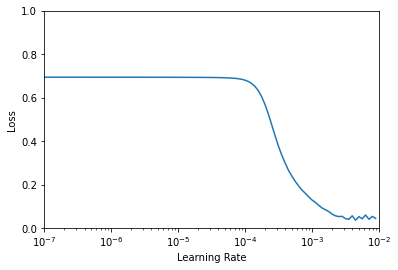

In [30]:
# FROM THIS PICK A LEARNING RATE
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-7,1e-2, 0, 1])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

### For overfitting: Introduce Dropout layer and L2 Regularizer

### For Hyper parameter tuning: Learning Rate Optimization

In [31]:
def compile_train_model(x_train, y_train, x_test, y_test,epochs=15):
    
    opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
    
    opt_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    opt_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    final_model=opt_model.fit(x_train, y_train,epochs=epochs,validation_data=(x_test,y_test), class_weight=class_weight)
    return opt_model,final_model

In [32]:
(opt_model,final_model)=compile_train_model(X_train,y_train,X_test,y_test)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 9232 samples, validate on 2309 samples
Epoch 1/15
9232/9232 [==============================] - 4s 415us/sample - loss: 0.7616 - accuracy: 0.4543 - val_loss: 0.7048 - val_accuracy: 0.2036
Epoch 2/15
9232/9232 [==============================] - 2s 187us/sample - loss: 0.6966 - accuracy: 0.4125 - val_loss: 0.6902 - val_accuracy: 0.7969
Epoch 3/15
9232/9232 [==============================] - 2s 193us/sample - loss: 0.6876 - accuracy: 0.7388 - val_loss: 0.6764 - val_accuracy: 0.6600
Epoch 4/15
9232/9232 [==============================] - 2s 181us/sample - loss: 0.6431 - accuracy: 0.7718 - val_loss: 0.5965 - val_accuracy: 0.7683
Epoch 5/15
9232/9232 [==============================] - 2s 181us/sample - loss: 0.5454 - accuracy: 0.8285 - val_loss: 0.5157 - val_accuracy: 0.7956
Epoch 6/15
9232/9232 [==============================] - 2s 190us/sample - loss: 0.4804 - accuracy: 0.8427 - val_loss: 0.4804 - val_accuracy: 0.8974
Epoch 7/15
923

## Prediction

In [33]:
y_pred=opt_model.predict_classes(X_test)

In [35]:
Pred=text_preprocess(["Worst flight ever"])
check=Pred.Preprocessing()
pred=opt_model.predict_classes(check)
pred =  'Positive' if pred > 0.5 else 'Negative'
print(pred)

Negative


## Use OOPs concept to implement inference

In [38]:
class Metrics:
    def __init__(self,test_label, Predicted_label):
        self.test_label=test_label
        self.Predicted_label=Predicted_label
    def ConfusionMatrix(self,test_label,Predicted_label):
        cm=confusion_matrix(test_label,Predicted_label)
        return cm
    def Report(self,test_label,Predicted_label):
        report = classification_report(test_label, Predicted_label)
        return report


In [39]:
Inference=Metrics(y_test, y_pred)

In [40]:
print(Inference.ConfusionMatrix(y_test,y_pred))

[[1641  198]
 [  50  420]]


In [41]:
print(Inference.Report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1839
           1       0.68      0.89      0.77       470

    accuracy                           0.89      2309
   macro avg       0.83      0.89      0.85      2309
weighted avg       0.91      0.89      0.90      2309



In [42]:
#Model Evaluation
train_acc = opt_model.evaluate(X_train, y_train)
test_acc = opt_model.evaluate(X_test,y_test)
print(train_acc, test_acc)

2309/2309 [==============================] - 0s 68us/sample - loss: 0.3283 - accuracy: 0.8926
[0.27325846345213917, 0.92634314] [0.3282866736494034, 0.8925942]


## Data Visualization

In [43]:
loss_train = final_model.history['loss']
loss_val = final_model.history['val_loss']
epochs=range(len(loss_train)) 

def plot_loss(training_loss,testing_loss):    

    plt.plot(epochs, training_loss, 'g', label='Training loss')
    plt.plot(epochs, testing_loss, 'b', label='validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

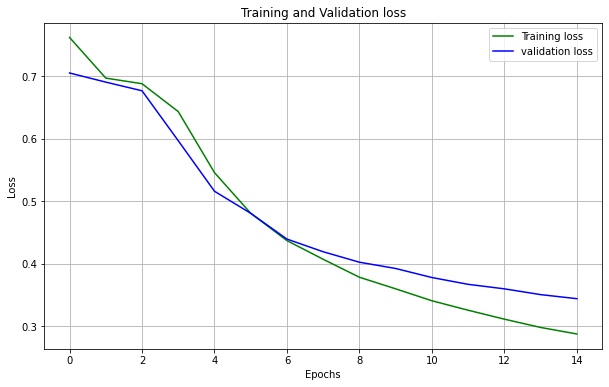

In [44]:
plt.figure(figsize=(10,6))
plot_loss(loss_train,loss_val)

In [45]:
acc_train = final_model.history['accuracy']
acc_val = final_model.history['val_accuracy']


def plot_accuracy(training_acc,testing_acc):    

    plt.plot(epochs, training_acc, 'g', label='Training Accuracy')
    plt.plot(epochs, testing_acc, 'b', label='validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

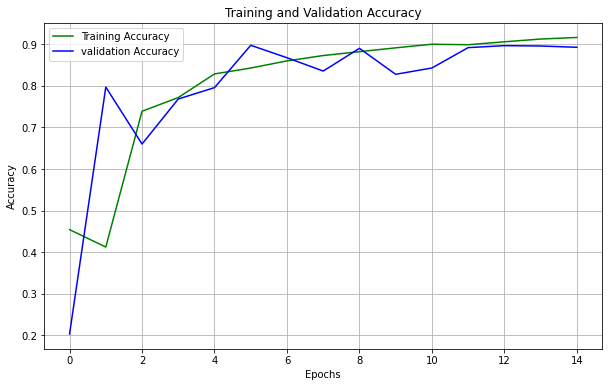

In [46]:
plt.figure(figsize=(10,6))
plot_accuracy(acc_train,acc_val)

## Pickle

In [47]:
opt_model.save("model.h5")
print("Saved model to disk")

Saved model to disk
